# This tutorial shows 3D-UNet layer by layer in Pytorch

# **3D UNet layer by layer explanation**

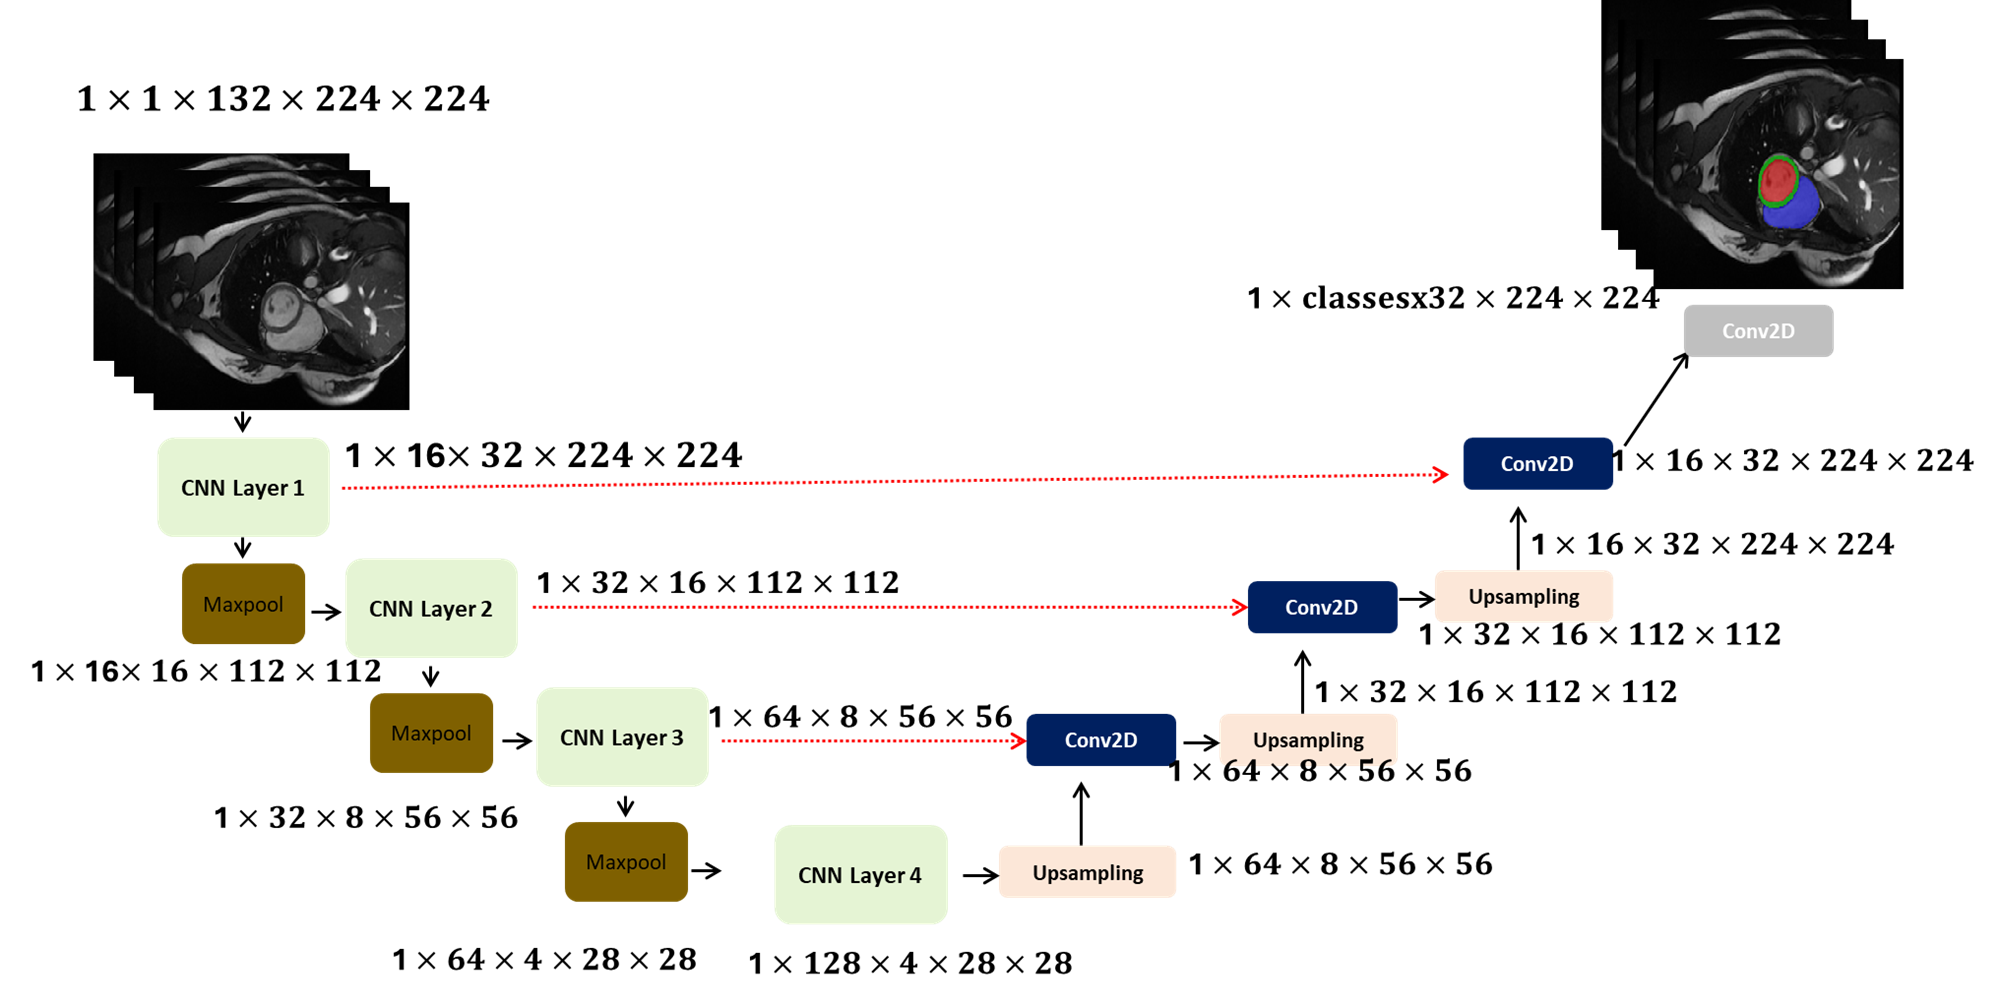

# **First conv layer**

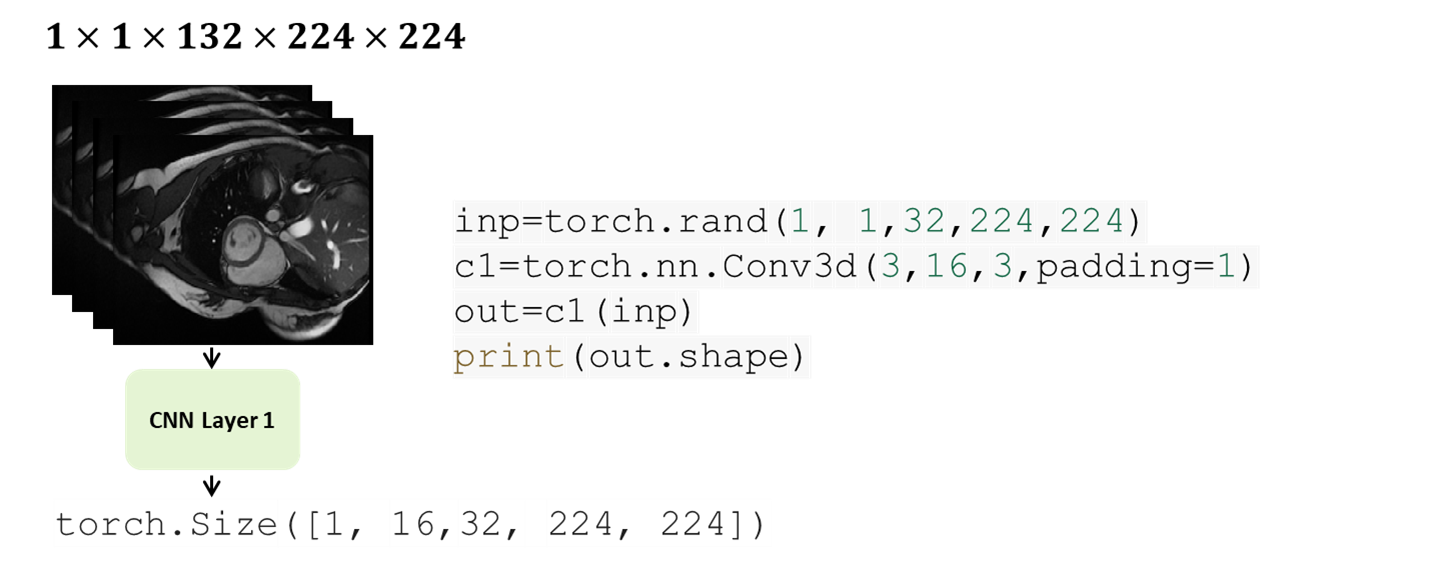

In [1]:
# first layer is convlutional 3d layer,
# we can make it 3D conv block
import torch
import torch.nn as nn
CNN_layer1=nn.Conv3d(1,16,3,1,1)
### input
inp=torch.rand(1,1,32,224,224) ## batchxCxDxHXW
outc1=CNN_layer1(inp)
print(outc1.shape)

torch.Size([1, 16, 32, 224, 224])


# **maxpool layer**

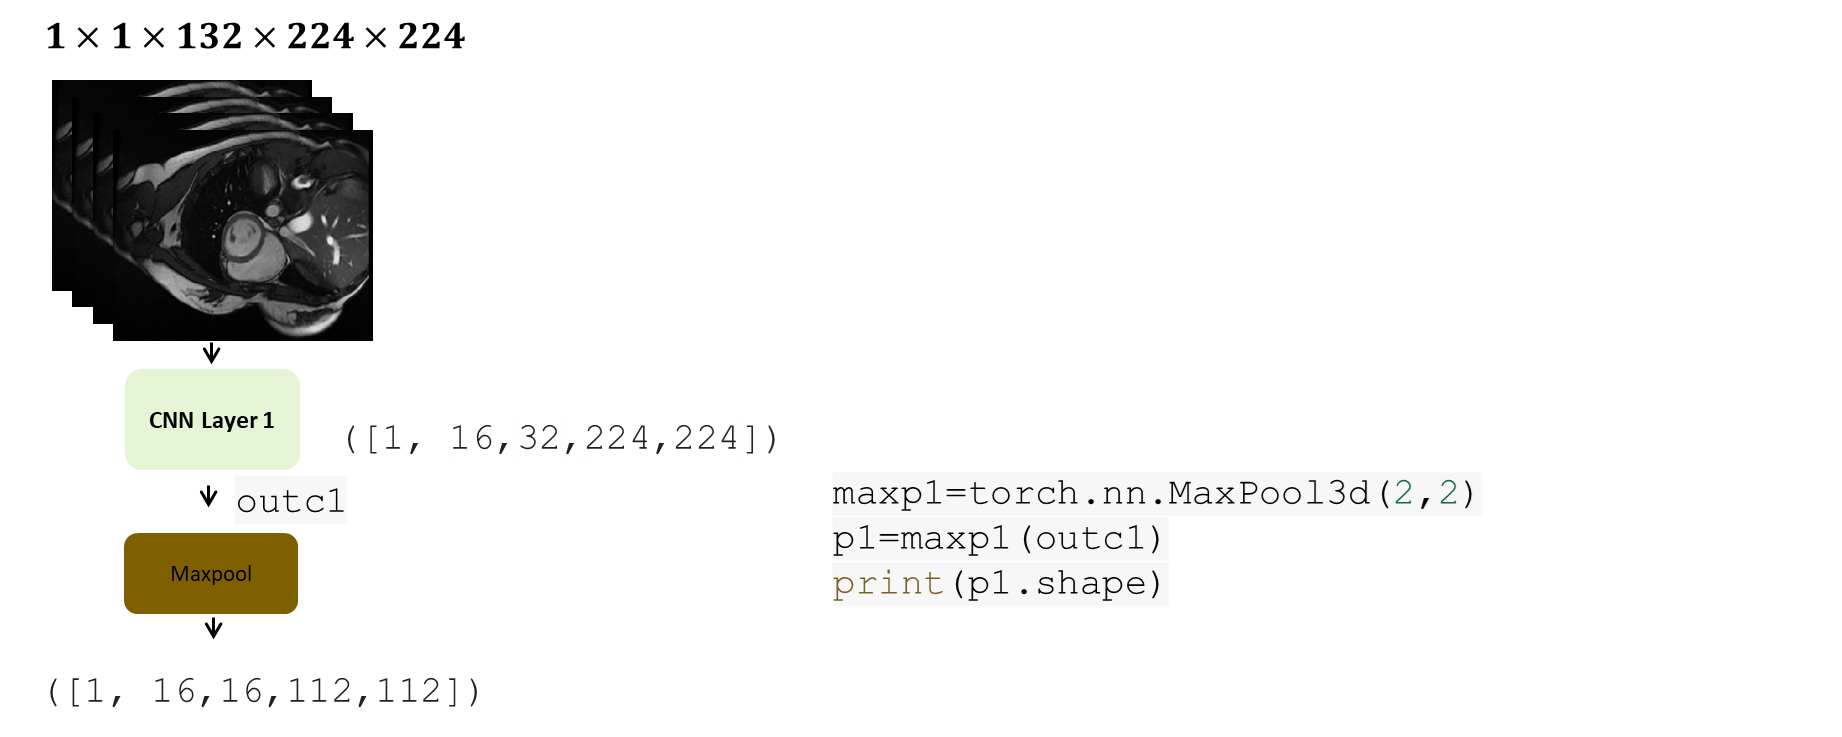

In [2]:
###### maxpool3d
maxp1=nn.MaxPool3d(2)
p1=maxp1(outc1)
print(p1.shape)

torch.Size([1, 16, 16, 112, 112])


# **Second layer**

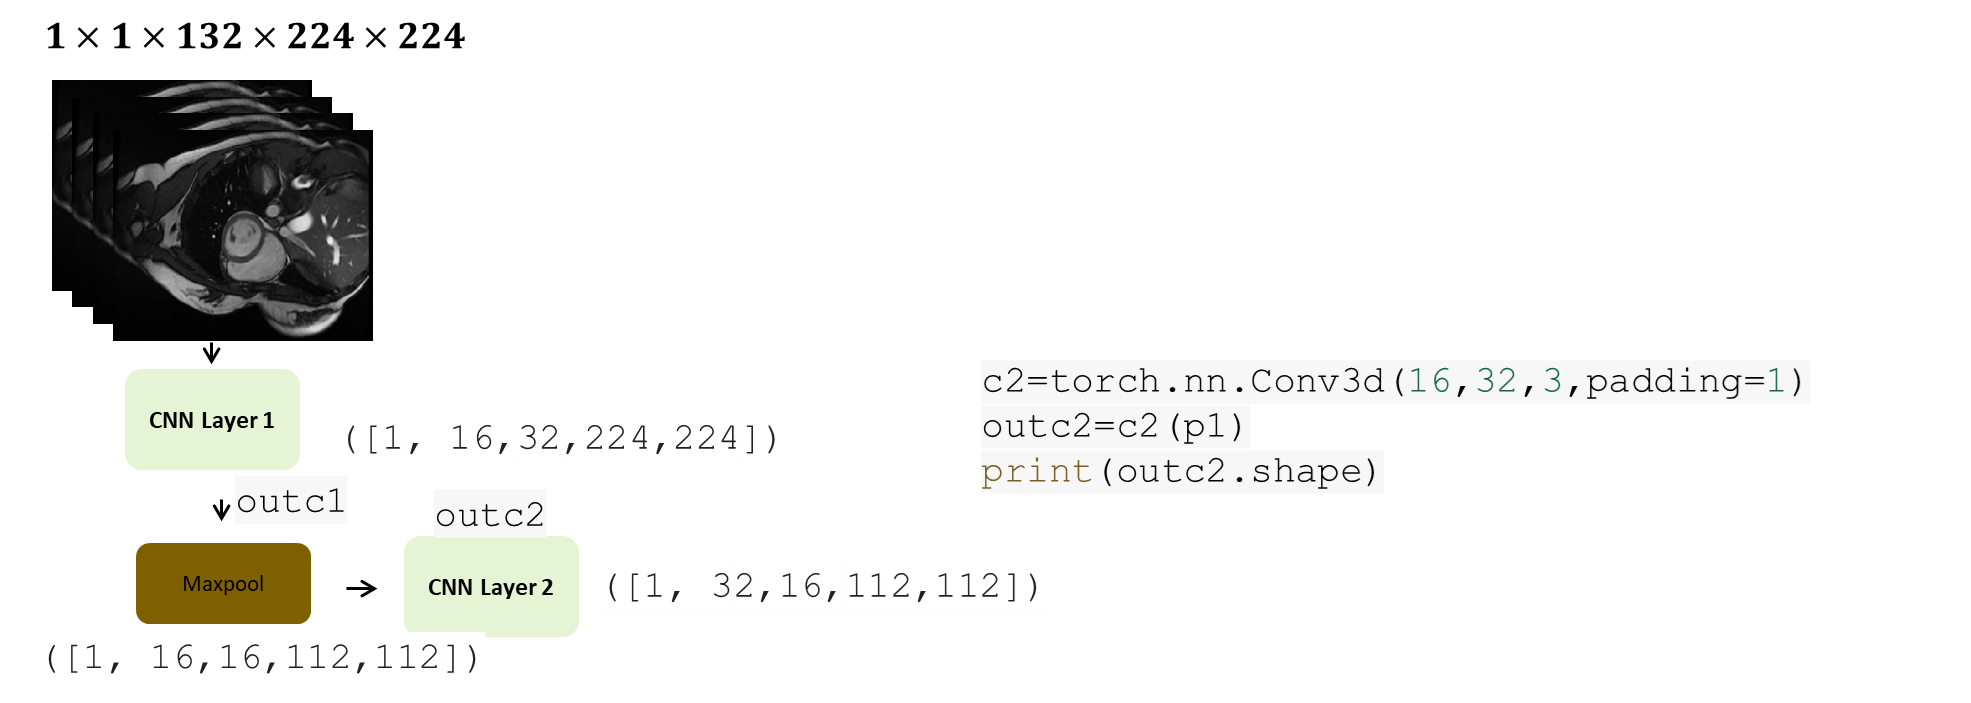

In [3]:
c2=nn.Conv3d(16,32,3,1,1)
outc2=c2(p1)
print(outc2.shape)

torch.Size([1, 32, 16, 112, 112])


# **Maxpool3D**

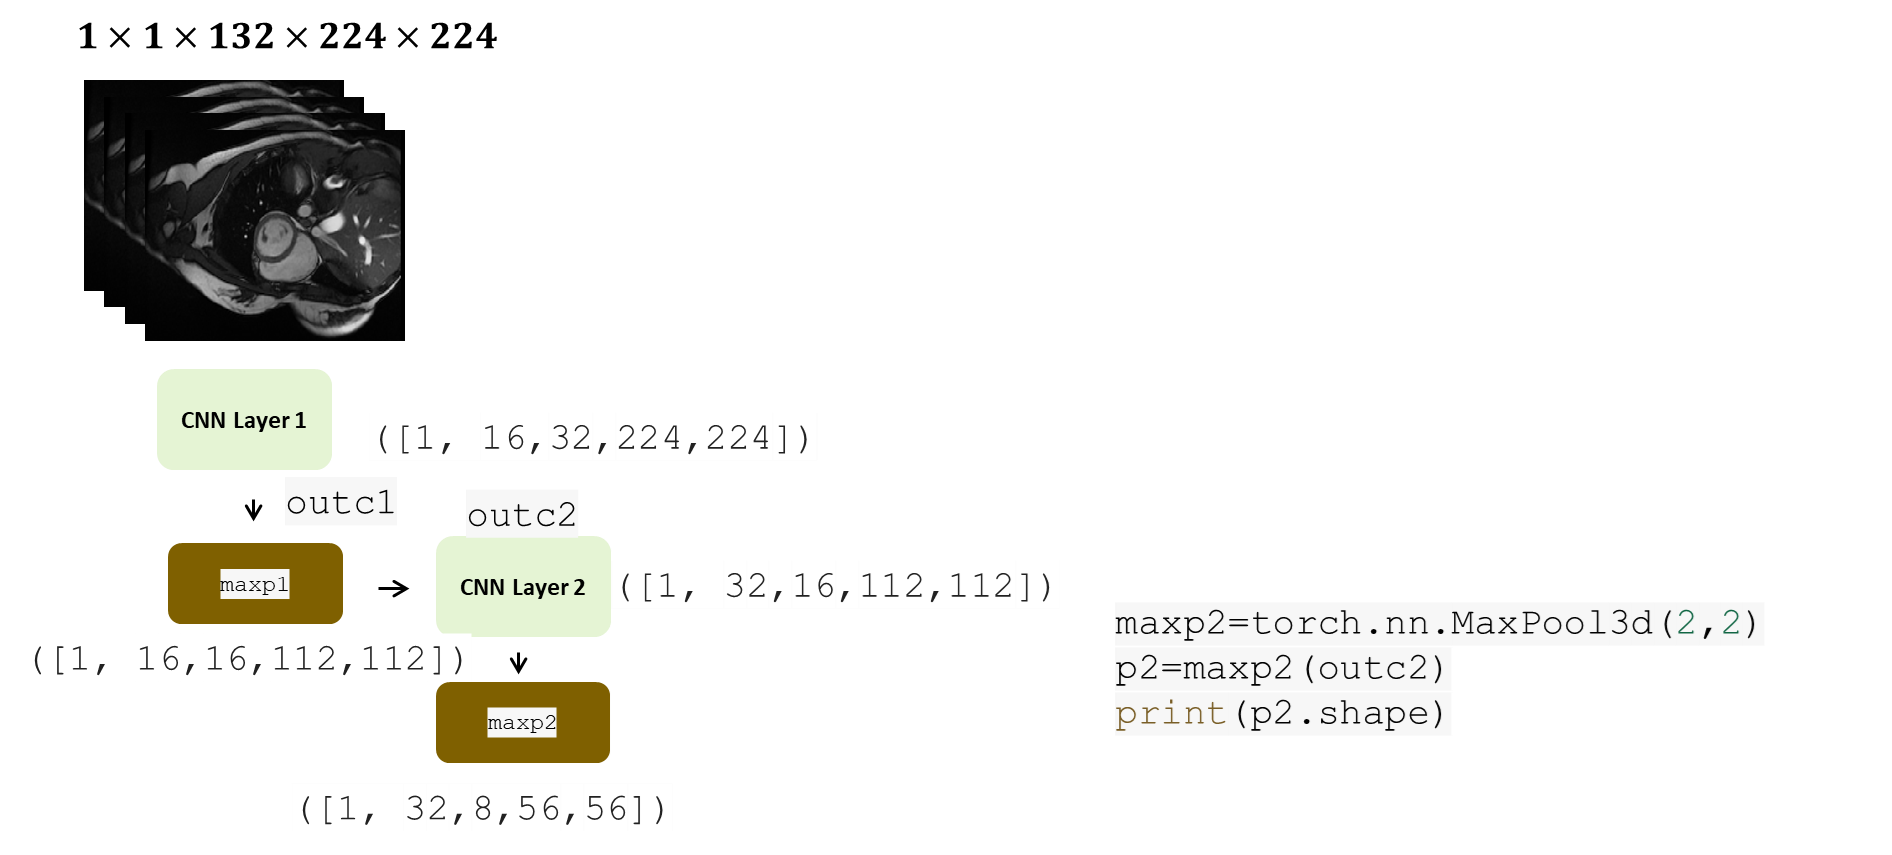

In [4]:
########## poollayer
maxp2=nn.MaxPool3d(2)
p2=maxp2(outc2)
print(p2.shape)

torch.Size([1, 32, 8, 56, 56])


# **Third Layer**

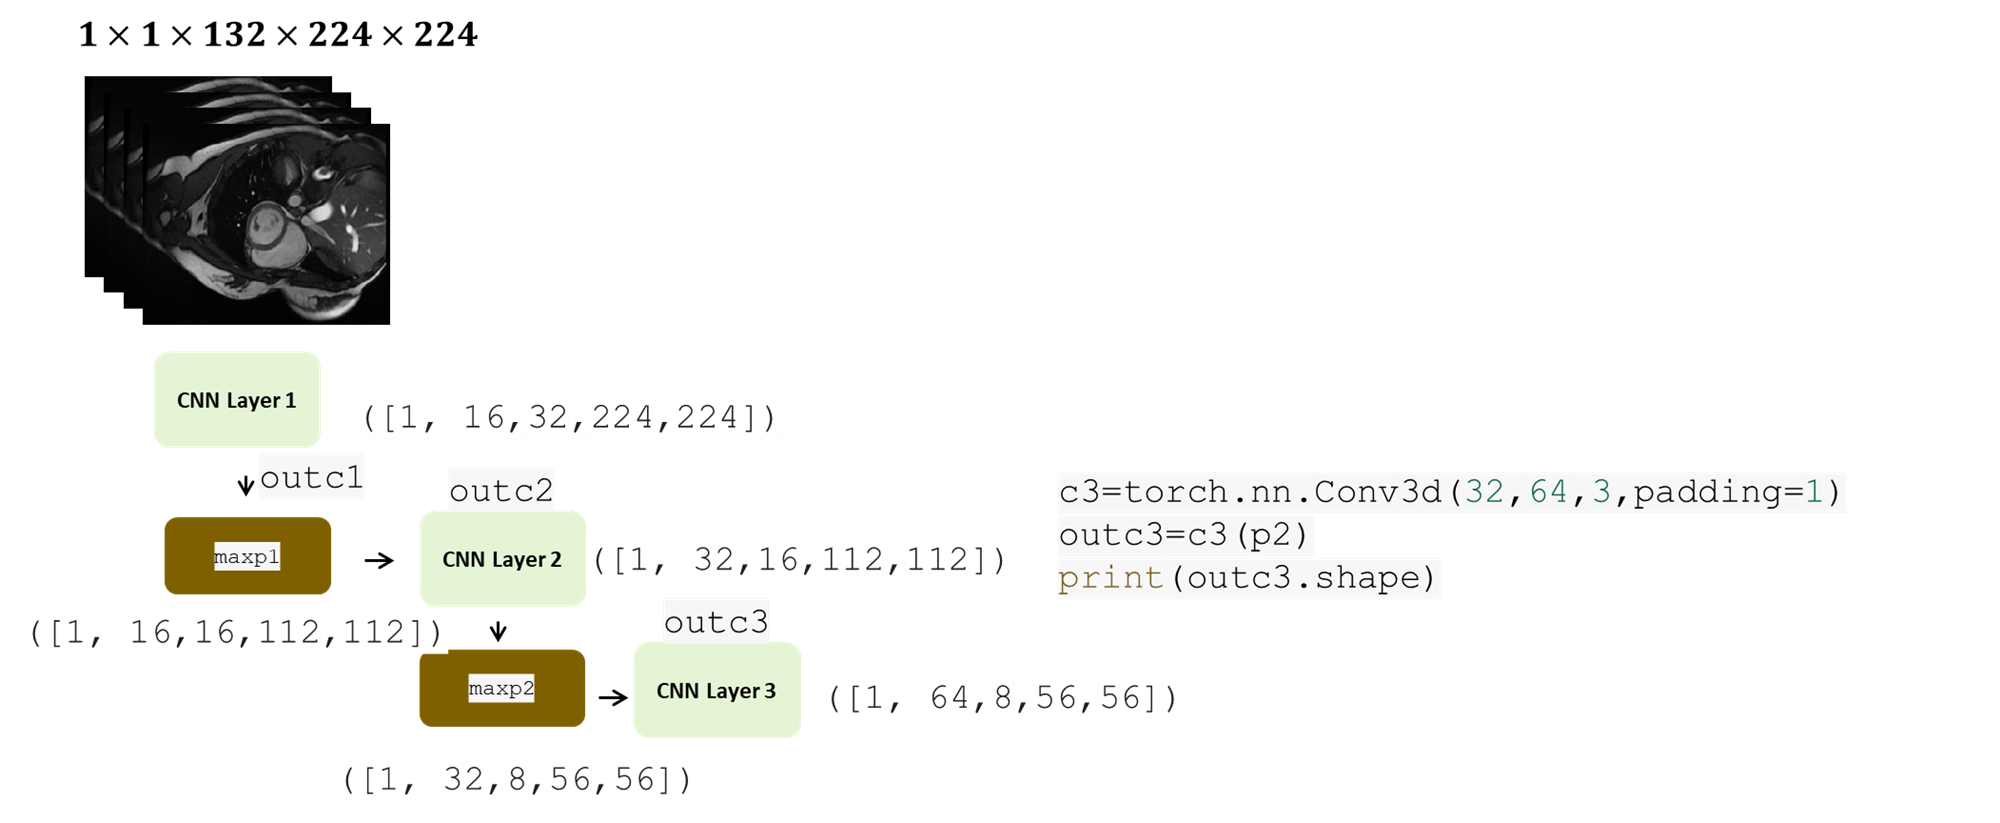


In [5]:
######### layer 3
c3=nn.Conv3d(32,64,3,1,1)
outc3=c3(p2)
print(outc3.shape)

torch.Size([1, 64, 8, 56, 56])


# **Maxpool3d**

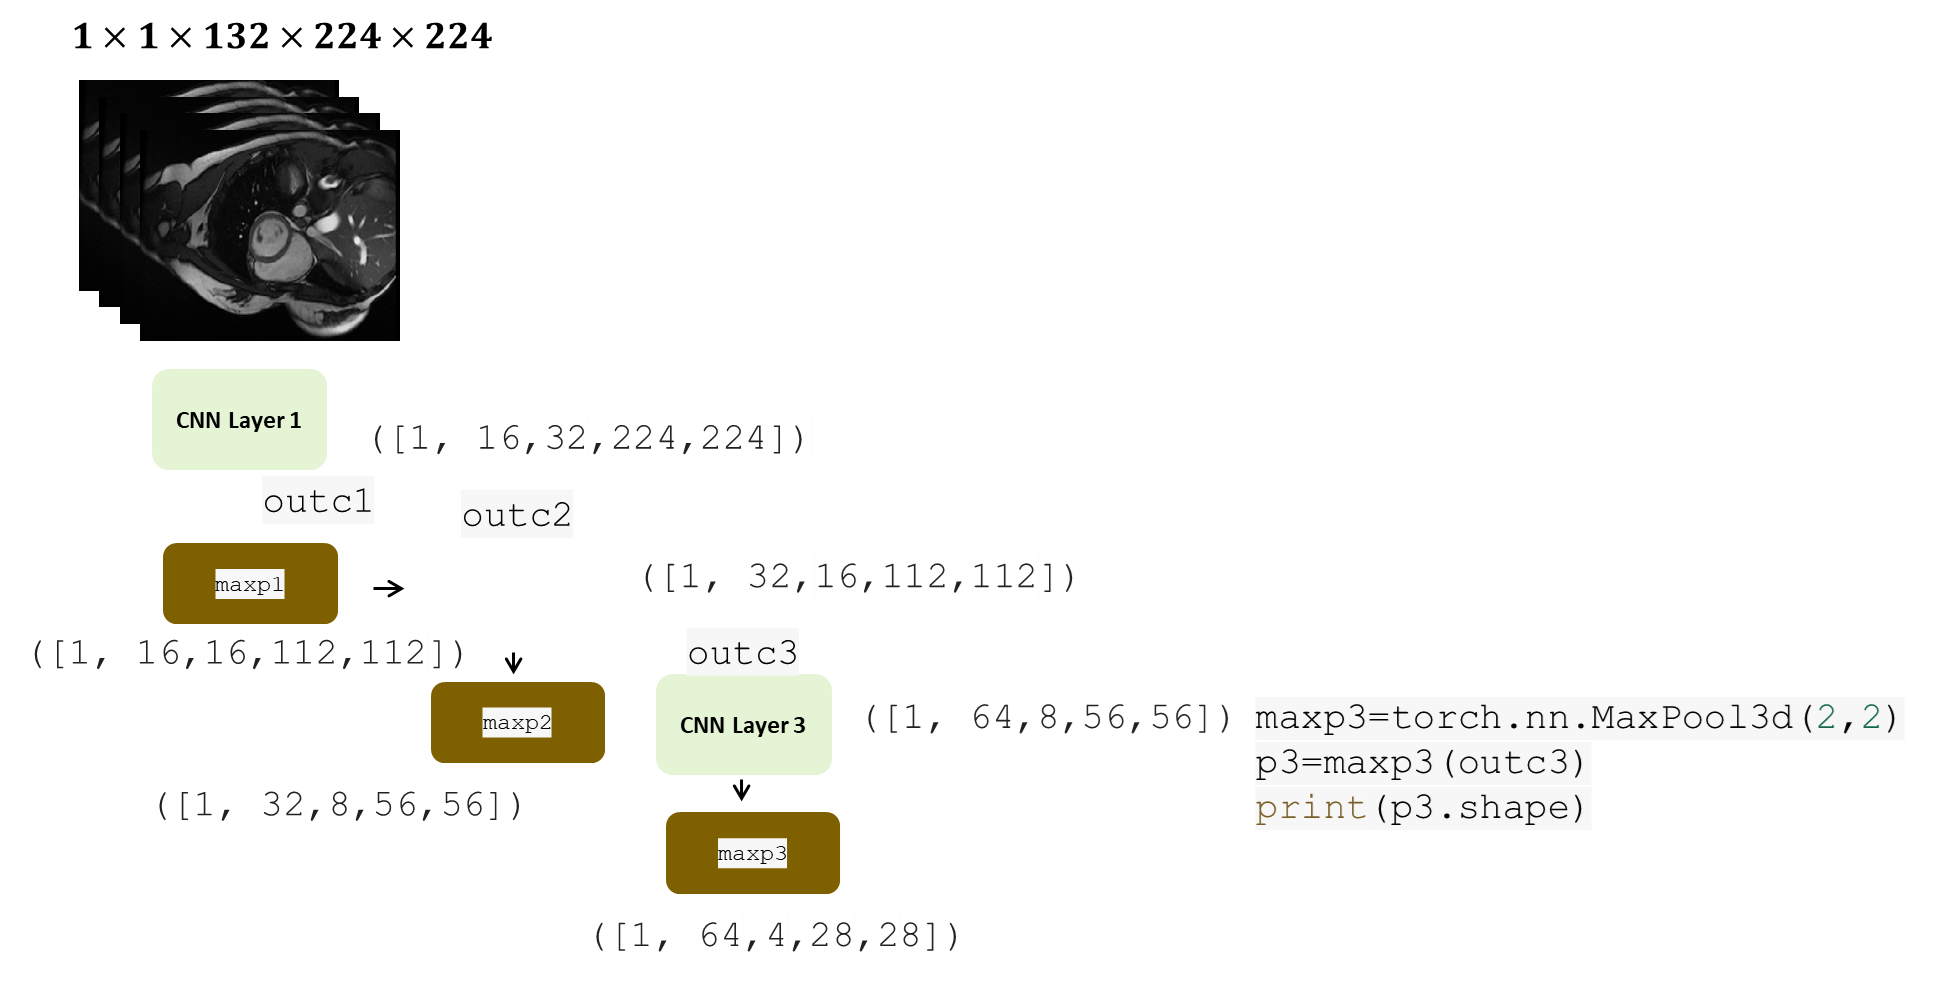

In [6]:
maxp3=nn.MaxPool3d(2)
p3=maxp3(outc3)
print(p3.shape)

torch.Size([1, 64, 4, 28, 28])


# **Bottom Layer**

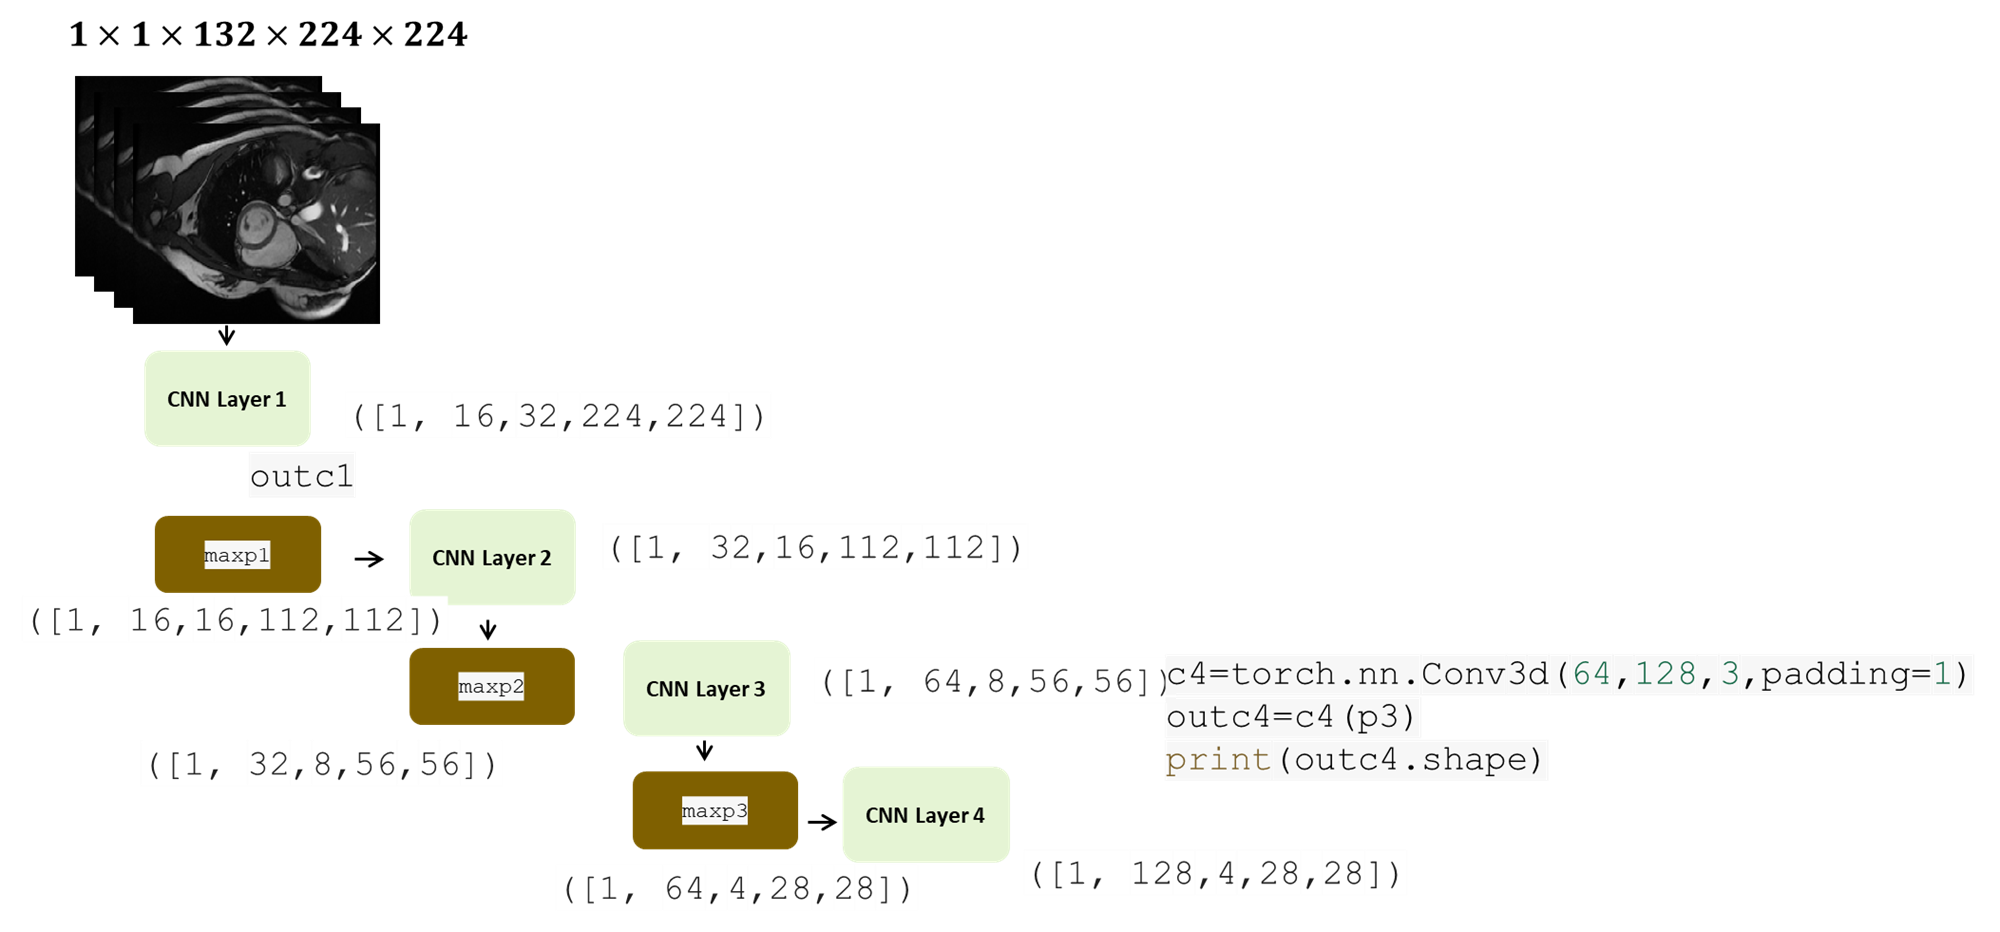

In [7]:
c4=nn.Conv3d(64,128,3,1,1)
bottom=c4(p3)
print(bottom.shape)

torch.Size([1, 128, 4, 28, 28])


# Decoder block

 ## Decoder block consisted of two layers and concationation.

 ### Upsamplig layer, concat features, conv layer
 First upsample encoder bottom layer, then concat with previous encoder layer and transform featues using conv layer.


 # Three steps used to build encoder layer
 ## step1: Upsample

 ## step2: concate

 ## step3: conv_layer

 Here first upsample layer

# **Step1: Upsample layer**

 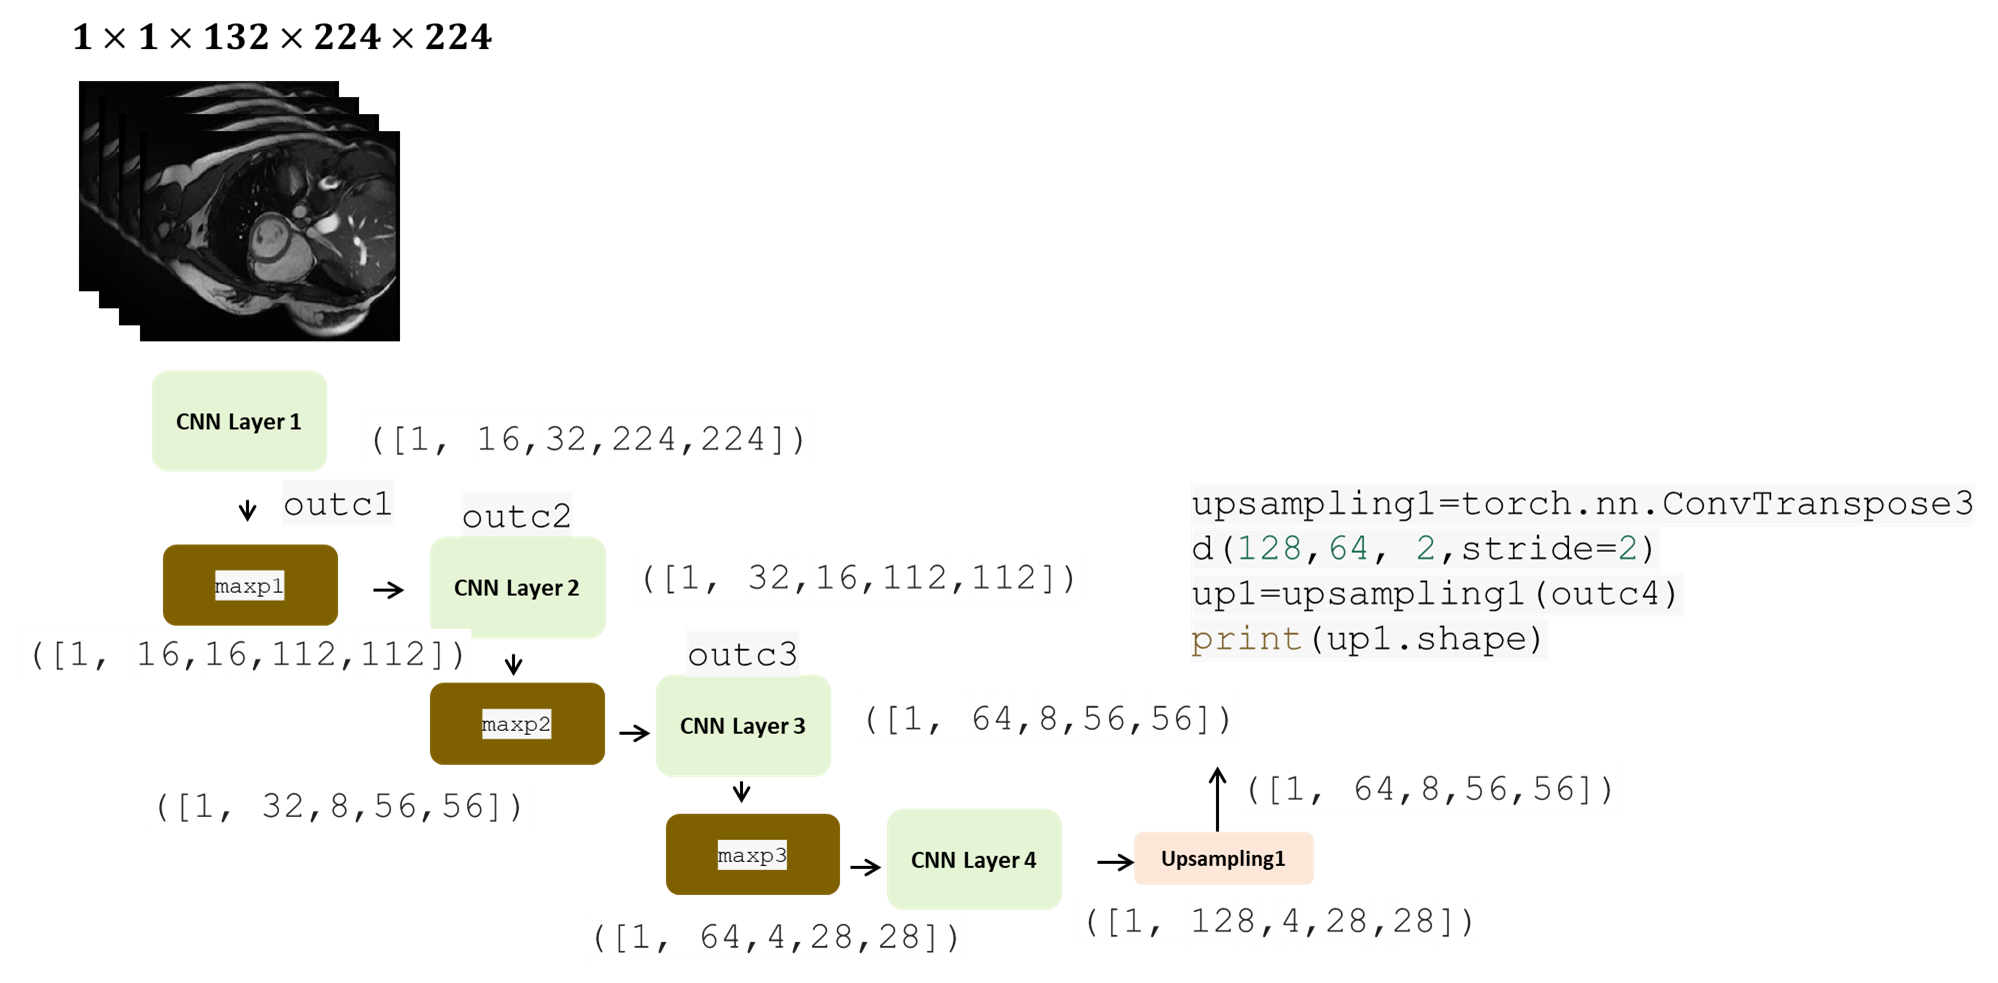



In [8]:
upsampling1=nn.ConvTranspose3d(128,64,2,2)
up1=upsampling1(bottom)  #### 1,128,4,28,28 transform features from 128 to 64 and upsample 4-8,28-56,28-56
print(up1.shape)

torch.Size([1, 64, 8, 56, 56])


# **Step2: Concat layer**
## Concate features from previous encoder layer in our case outc3 with up1 features

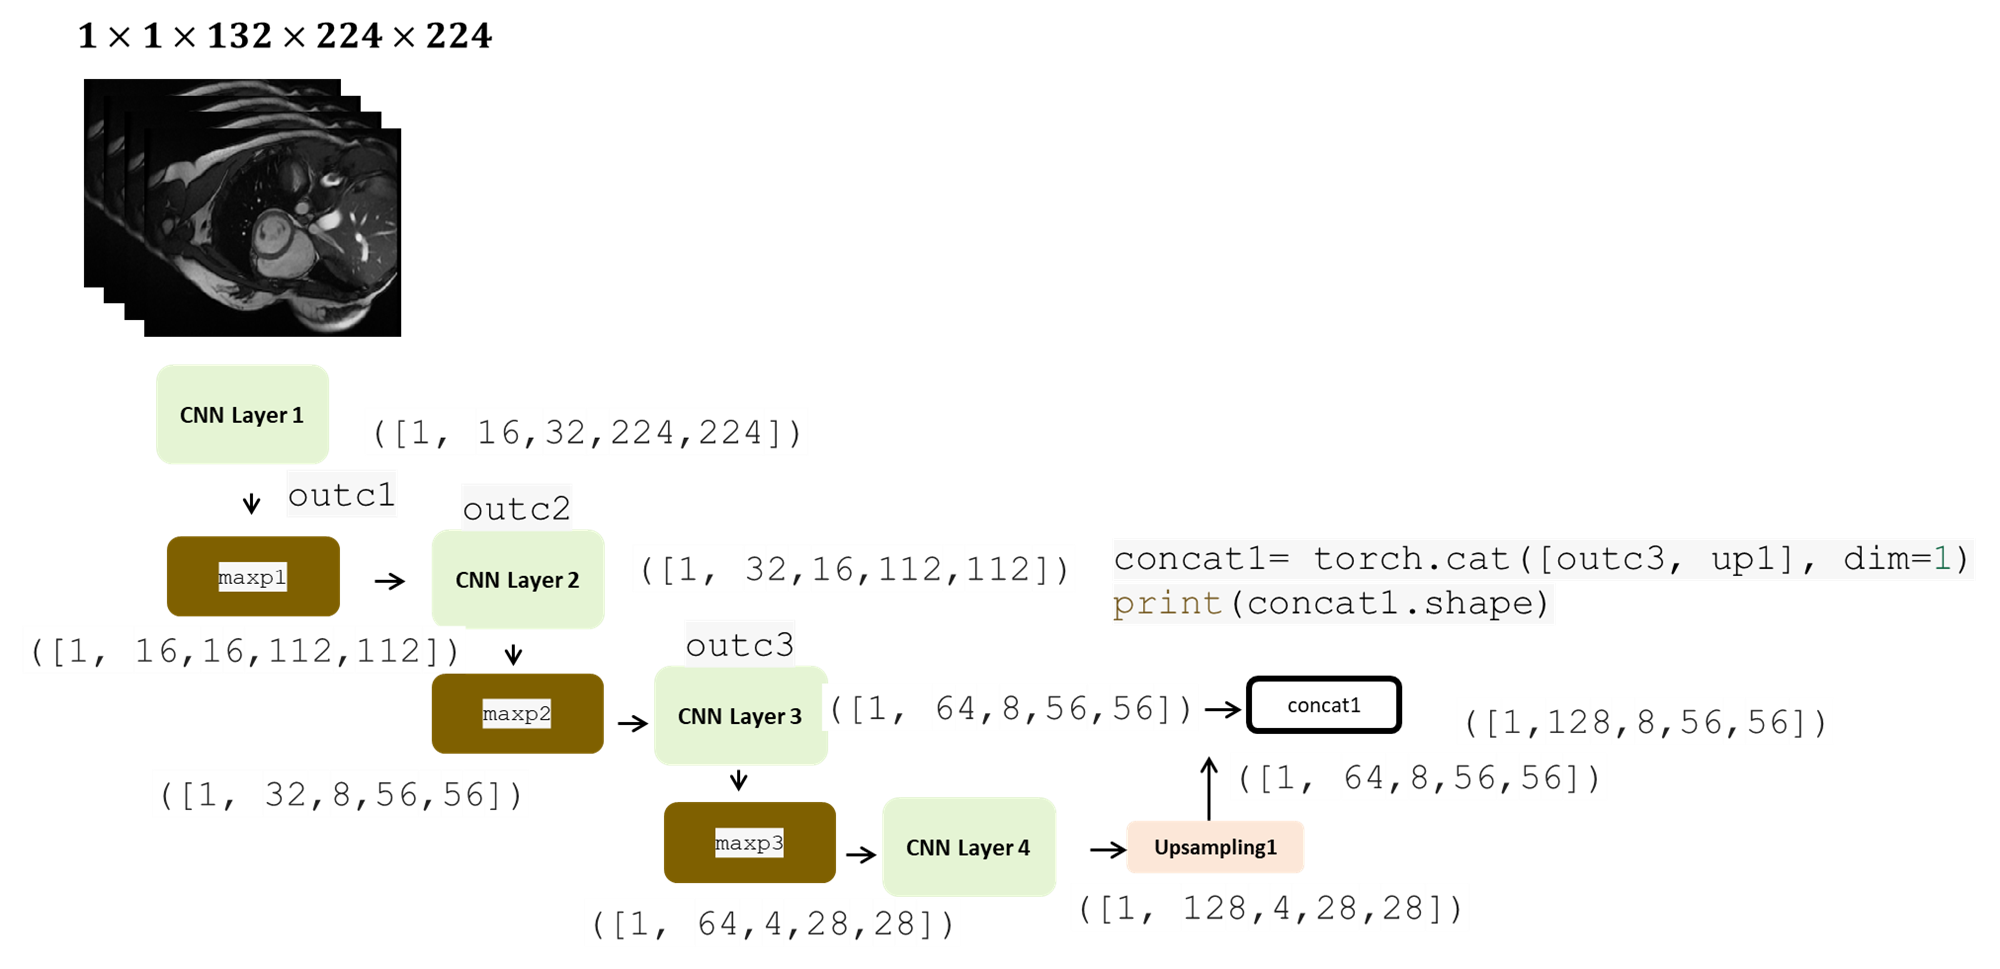


In [9]:
concat1=torch.concat([up1,outc3],dim=1)
print(concat1.shape)

torch.Size([1, 128, 8, 56, 56])


# Step3: Conv_layer
## this layer transform the concate features

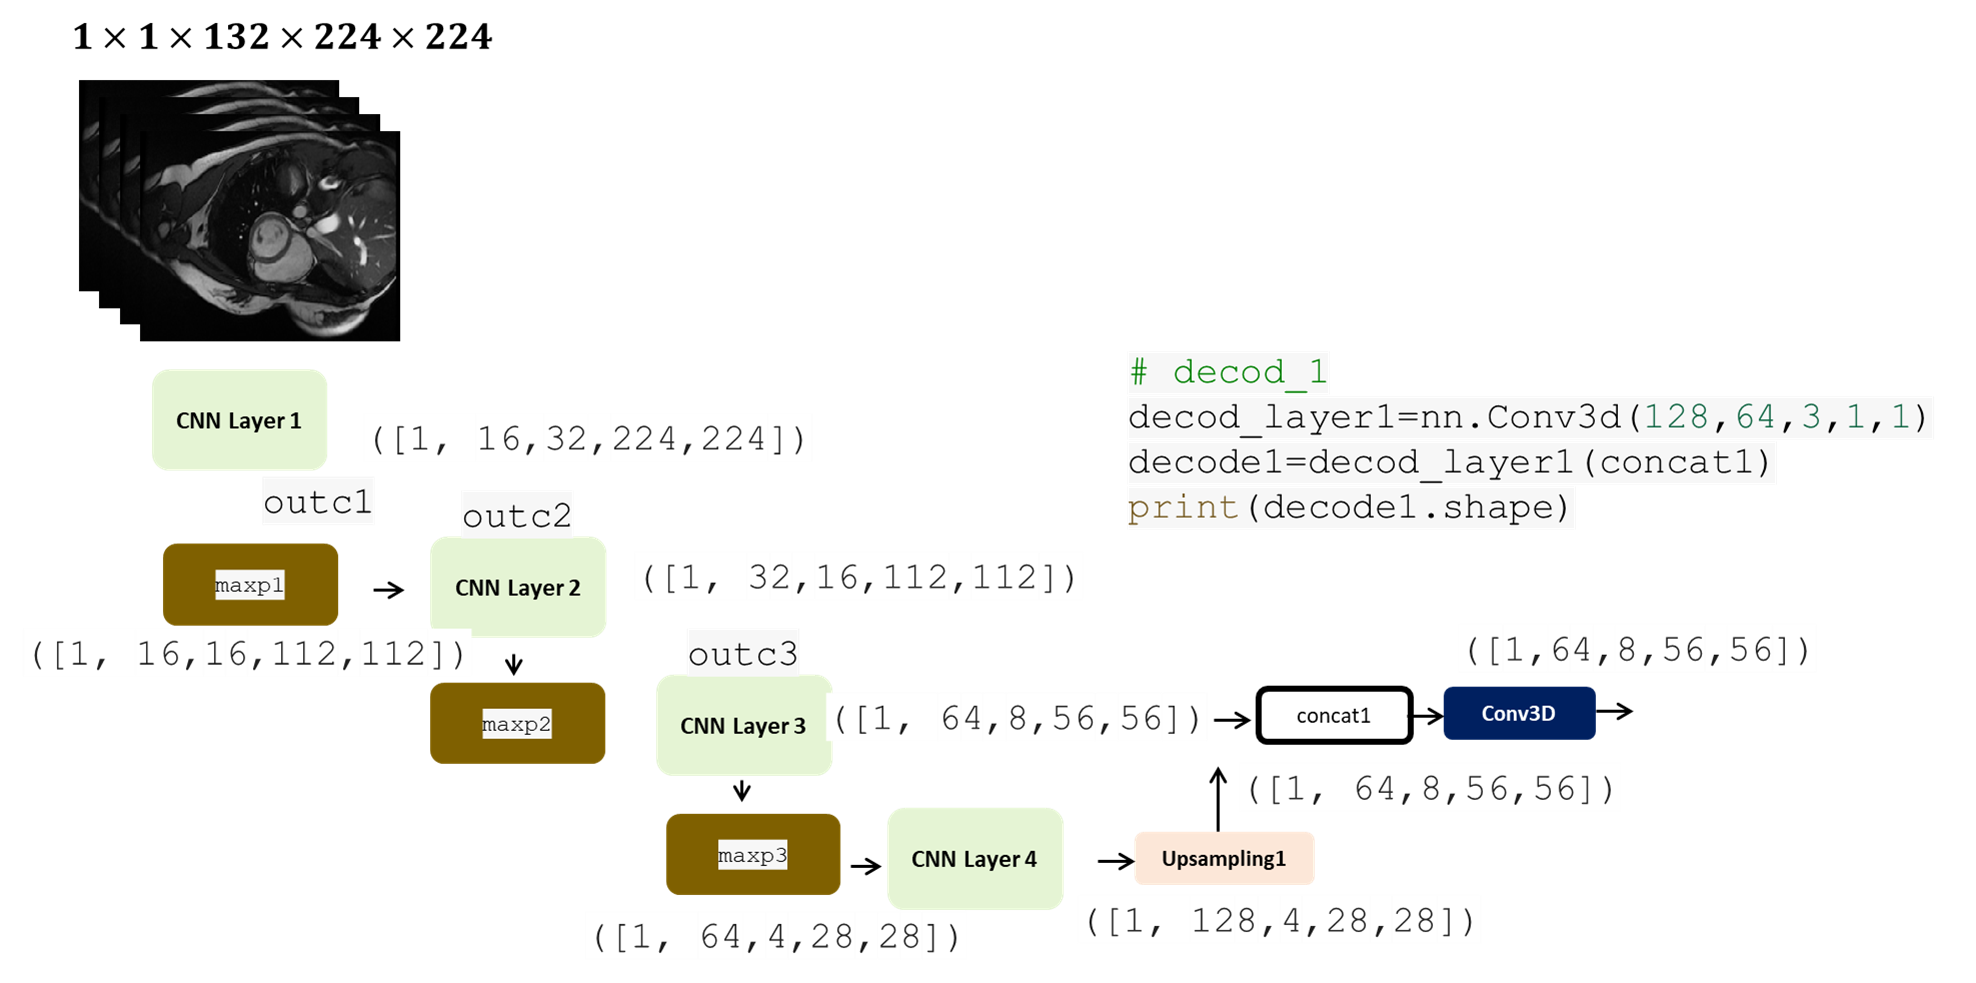


In [10]:
# decod_1
decod_layer1=nn.Conv3d(128,64,3,1,1)
decode1=decod_layer1(concat1)
print(decode1.shape)

torch.Size([1, 64, 8, 56, 56])


# **Decoder layer**

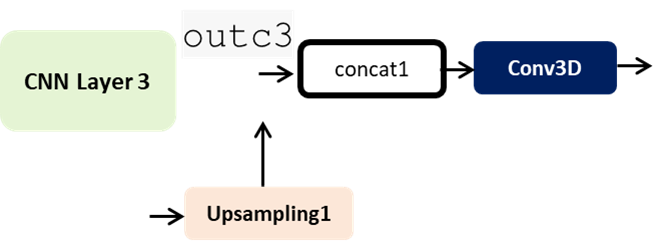

# **Decode layer 2**

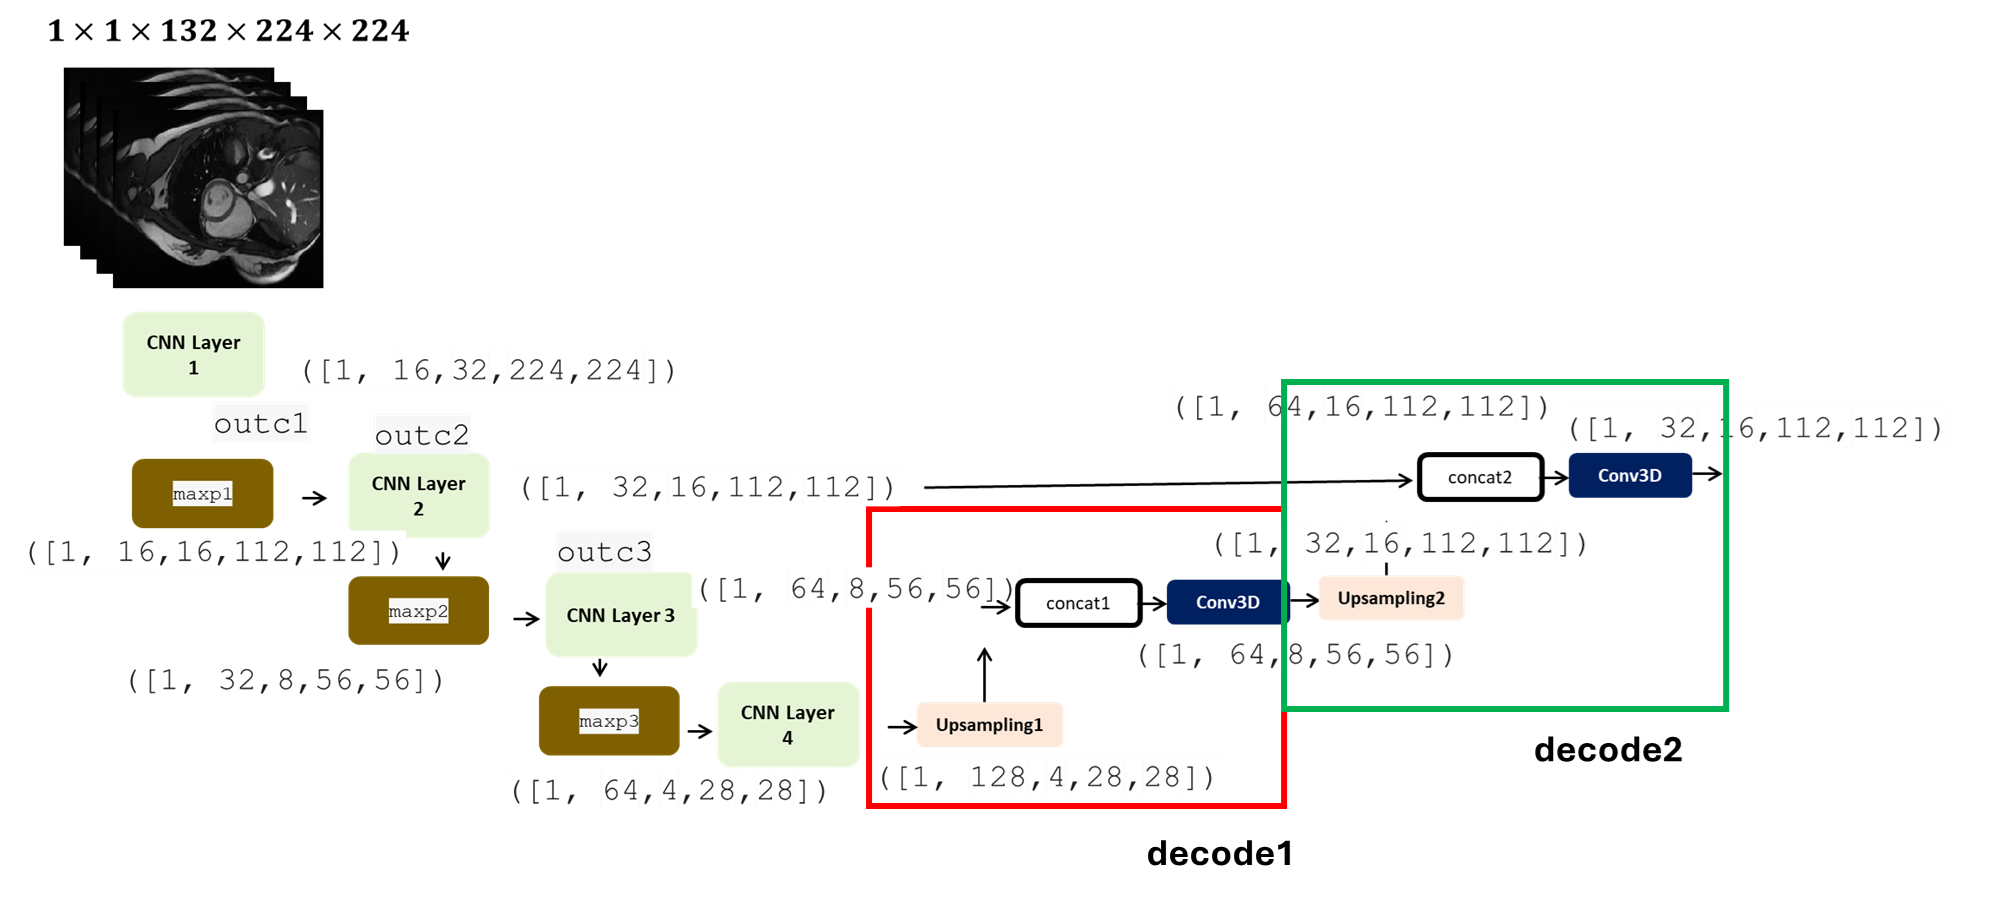

In [11]:
# decoder layer2
##### up2
upsampling2=nn.ConvTranspose3d(64,32,2,2)
up2=upsampling2(decode1)
##### concat 2
concat2=torch.concat([up2,outc2],dim=1)
### decode layer 2
decod_layer2=nn.Conv3d(64,32,3,1,1)
decode2=decod_layer2(concat2)

print(decode2.shape)

torch.Size([1, 32, 16, 112, 112])


# **decode layer 3**

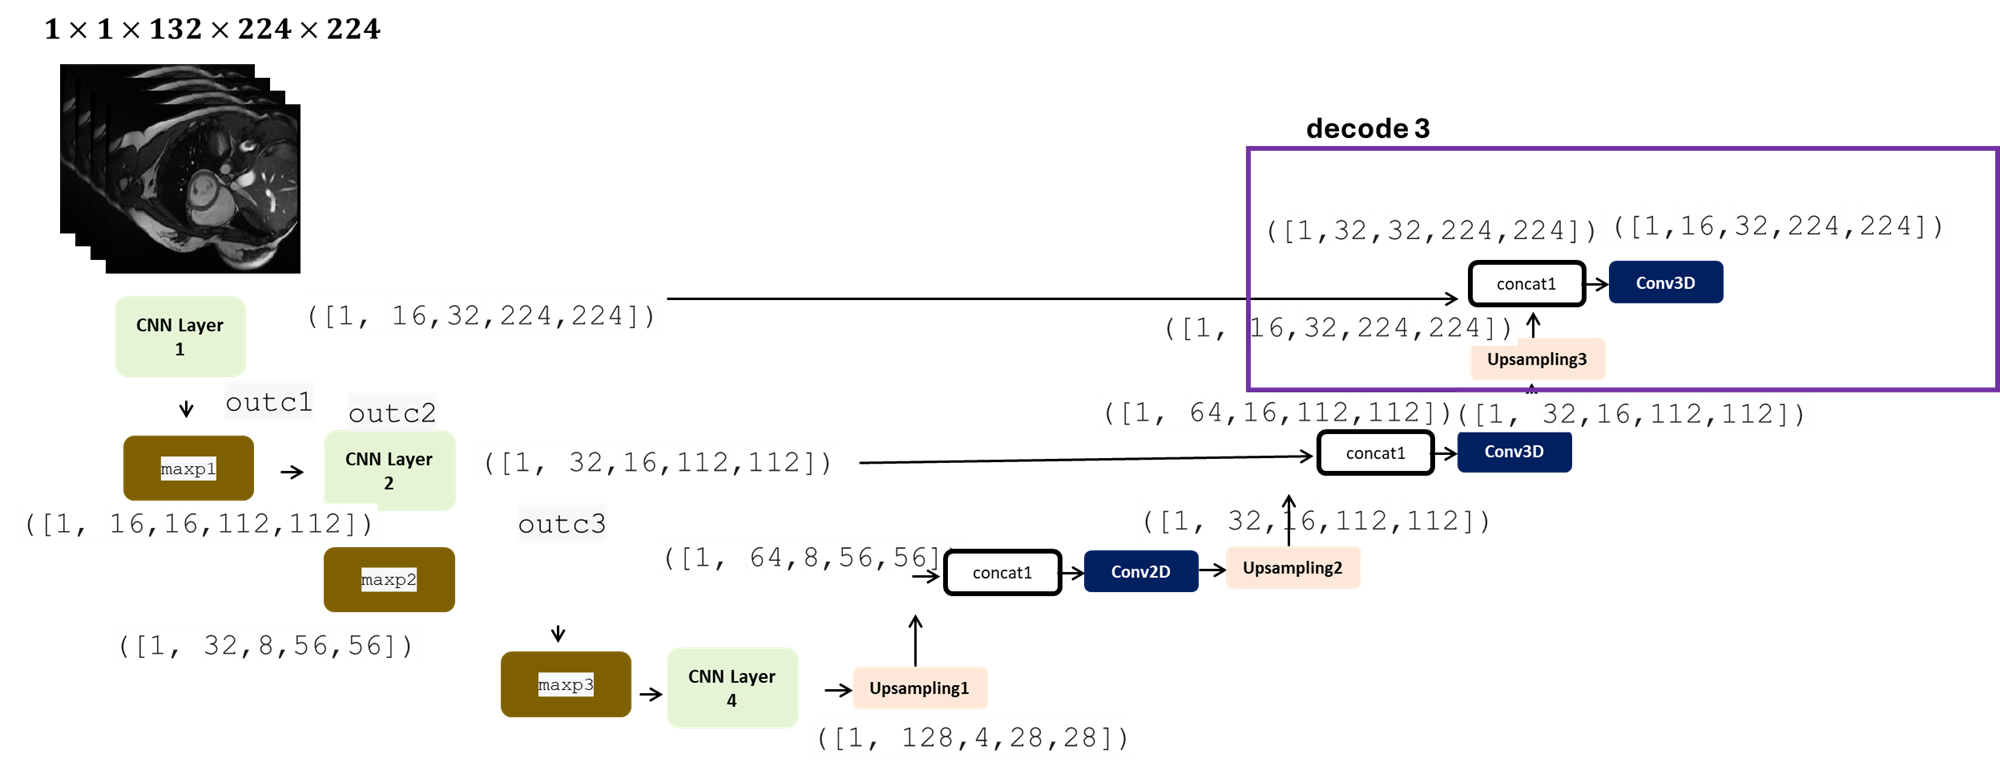

In [12]:
# decoder 3 layer
##### up2
upsampling3=nn.ConvTranspose3d(32,16,2,2)
up3=upsampling3(decode2)
##### concat 2
concat3=torch.concat([up3,outc1],dim=1)
### decode layer 2
decod_layer3=nn.Conv3d(32,16,3,1,1)
decode3=decod_layer3(concat3)
print(decode3.shape)

torch.Size([1, 16, 32, 224, 224])


# **1x1 conv layer**

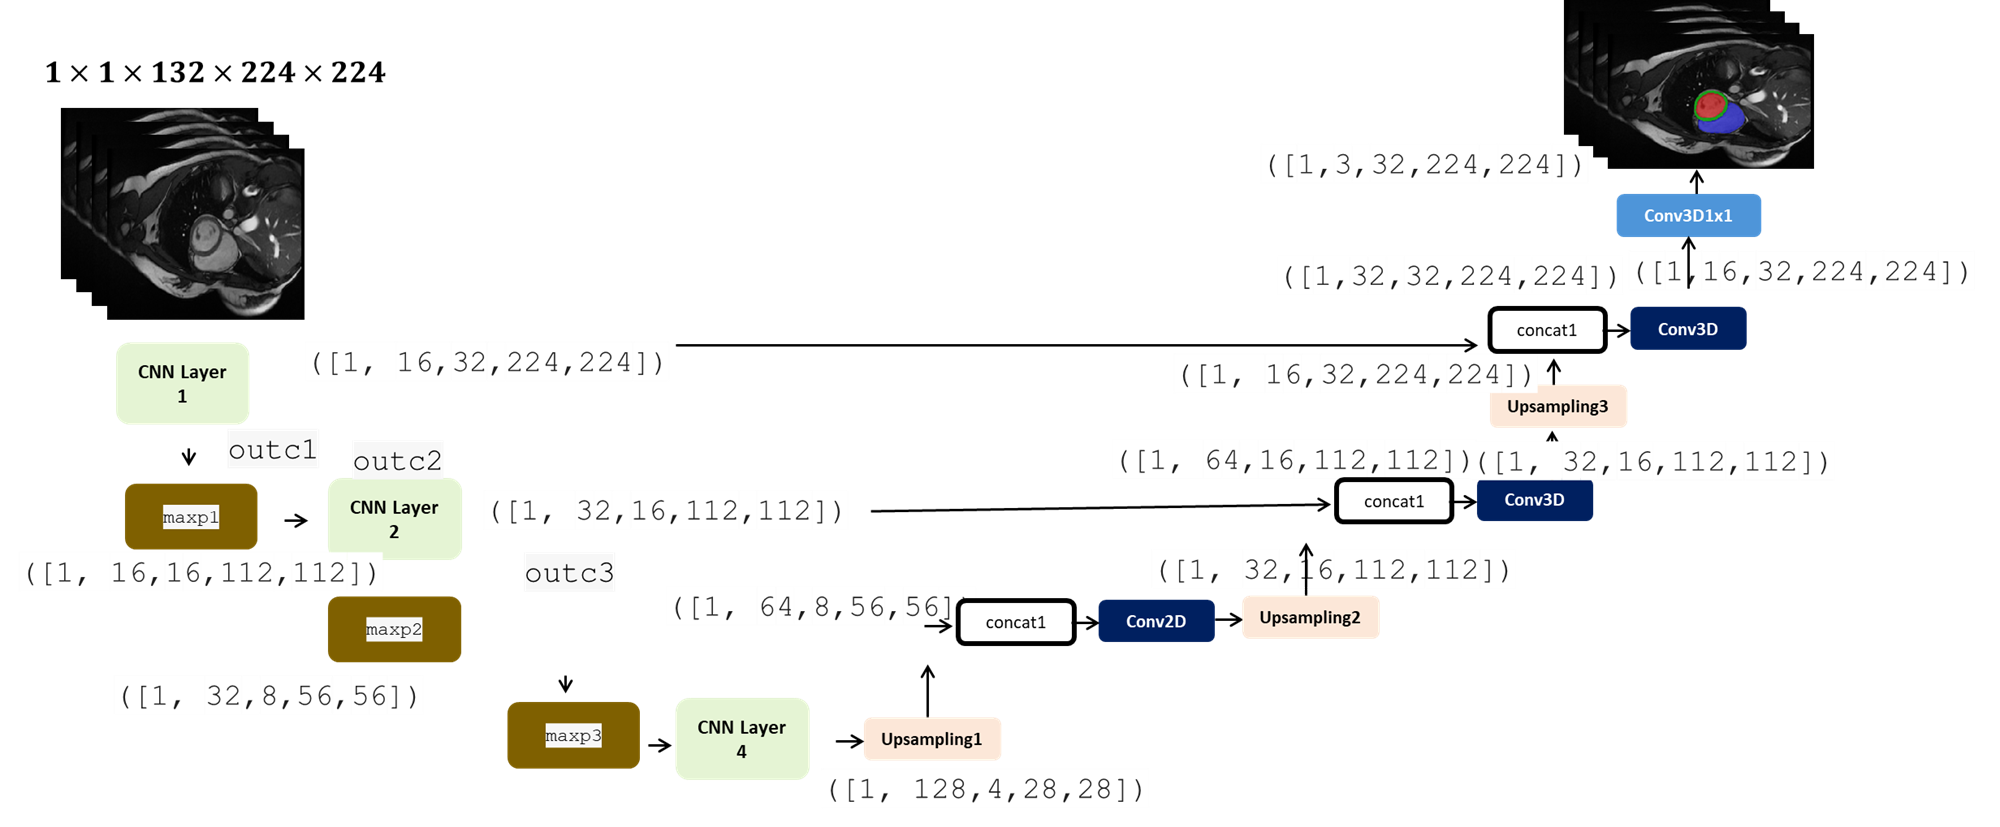


In [13]:
final_layer=nn.Conv3d(16,3,3,1,1)
out=final_layer(decode3)
print(out.shape)

torch.Size([1, 3, 32, 224, 224])


In [14]:
#### put all layers together to make full 3D-UNet
import torch
import torch.nn as nn
class My_3UNet(nn.Module):
  def __init__(self):
    super(My_3UNet,self).__init__()

    self.c1=nn.Conv3d(1,16,3,1,1)
    self.p1=nn.MaxPool3d(2)

    self.c2=nn.Conv3d(16,32,3,1,1)
    self.p2=nn.MaxPool3d(2)

    self.c3=nn.Conv3d(32,64,3,1,1)
    self.p3=nn.MaxPool3d(2)
    self.bottom=nn.Conv3d(64,128,3,1,1)

    # decoder
    self.up1=nn.ConvTranspose3d(128,64,2,2)
    self.decode1=nn.Conv3d(128,64,3,1,1)

    self.up2=nn.ConvTranspose3d(64,32,2,2)
    self.decode2=nn.Conv3d(64,32,3,1,1)

    self.up3=nn.ConvTranspose3d(32,16,2,2)
    self.decode3=nn.Conv3d(32,16,3,1,1)
    self.final=nn.Conv3d(16,3,1)

  def forward(self,x):

    layer1=self.c1(x)
    p1=self.p1(layer1)

    layer2=self.c2(p1)
    p2=self.p1(layer2)

    layer3=self.c3(p2)
    p3=self.p1(layer3)

    bottom=self.bottom(p3)
    ### decoder layers
    up1=self.up1(bottom)
    concat1=torch.concat([up1,layer3],dim=1)
    decode1=self.decode1(concat1)

    up2=self.up2(decode1)
    concat2=torch.concat([up2,layer2],dim=1)
    decode2=self.decode2(concat2)

    up3=self.up3(decode2)
    concat3=torch.concat([up3,layer1],dim=1)
    decode3=self.decode3(concat3)
    out=self.final(decode3)
    return out
model=My_3UNet()
inp=torch.rand(1,1,32,224,224)
out=model(inp)
print(out.shape)

torch.Size([1, 3, 32, 224, 224])
